In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

## Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Combined_Finance_Data.csv to Combined_Finance_Data (4).csv


## Load Data

In [ ]:
data = pd.read_csv('Combined_Finance_Data.csv')
print("Dataset berhasil dimuat")

Dataset berhasil dimuat


## Informasi Dataset

In [ ]:
print(data.head(5))

         Date  Day  Month  Year  Income Source  Expense        Description  \
0  2024-06-01    1      6  2024       0    NaN        0              30000   
1  2024-06-01    1      6  2024       0    NaN   20,000             Bensin   
2  2024-06-01    1      6  2024 200,000    Mak   10,000  Makan sop pak min   
3  2024-06-02    2      6  2024       0    NaN        0              63000   
4  2024-06-02    2      6  2024       0    NaN    2,000             Parkir   

   Debt_Amount Debt_To    Detail_Hutang  
0            0     NaN              NaN  
1       11,000   Naura    Naura (11000)  
2       12,000    Abdi     Abdi (12000)  
3      424,200  137300  137300 (424200)  
4            0     NaN              NaN  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1788 non-null   object 
 1   Day            1788 non-null   int64  
 2   Month          1788 non-null   int64  
 3   Year           1788 non-null   int64  
 4   Income         1788 non-null   float64
 5   Source         26 non-null     object 
 6   Expense        1788 non-null   float64
 7   Description    1743 non-null   object 
 8   Debt_Amount    1788 non-null   float64
 9   Debt_To        69 non-null     object 
 10  Detail_Hutang  69 non-null     object 
dtypes: float64(3), int64(3), object(5)
memory usage: 153.8+ KB
None


In [ ]:
print(data.describe())

        Day  Month  Year     Income    Expense  Debt_Amount
count 1,788  1,788 1,788      1,788      1,788        1,788
mean     15      7 2,025    253,432    244,368        3,964
std       9      3     0  1,550,175  1,478,934       38,624
min       1      1 2,024          0          0            0
25%       8      5 2,024          0     30,000            0
50%      15      8 2,025          0    100,000            0
75%      23     10 2,025          0    150,000            0
max      31     12 2,025 23,348,890 28,478,000      721,400


# Data Cleaning

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1788 non-null   datetime64[ns]
 1   Day            1788 non-null   int64         
 2   Month          1788 non-null   int64         
 3   Year           1788 non-null   int64         
 4   Income         1788 non-null   float64       
 5   Source         26 non-null     object        
 6   Expense        1788 non-null   float64       
 7   Description    1743 non-null   object        
 8   Debt_Amount    1788 non-null   float64       
 9   Debt_To        69 non-null     object        
 10  Detail_Hutang  69 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 153.8+ KB
None


In [ ]:
data['Description'] = data['Description'].fillna('Unknown')
data['Description'] = data['Description'].astype(str)
data.head()

,Date,Day,Month,Year,Income,Source,Expense,Description,Debt_Amount,Debt_To,Detail_Hutang
0,2024-06-01,1,6,2024,0,NaN,0,30000,0,NaN,NaN
1,2024-06-01,1,6,2024,0,NaN,"20,000",Bensin,"11,000",Naura,Naura (11000)
2,2024-06-01,1,6,2024,"200,000",Mak,"10,000",Makan sop pak min,"12,000",Abdi,Abdi (12000)
3,2024-06-02,2,6,2024,0,NaN,0,63000,"424,200",137300,137300 (424200)
4,2024-06-02,2,6,2024,0,NaN,"2,000",Parkir,0,NaN,NaN


In [ ]:
data_expense = data.loc[data['Expense'].fillna(0) > 0].copy()
data_expense.head()
data_expense.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1729 entries, 1 to 1787
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1729 non-null   datetime64[ns]
 1   Day            1729 non-null   int64         
 2   Month          1729 non-null   int64         
 3   Year           1729 non-null   int64         
 4   Income         1729 non-null   float64       
 5   Source         20 non-null     object        
 6   Expense        1729 non-null   float64       
 7   Description    1729 non-null   object        
 8   Debt_Amount    1729 non-null   float64       
 9   Debt_To        44 non-null     object        
 10  Detail_Hutang  44 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 162.1+ KB


In [ ]:
def assign_category(text):
  text = text.lower()
  if any(x in text for x in['makan', 'nasi', 'sarapan', 'bubur', 'soto', 'mie', 'bakso', 'ayam']):
    return 'Makan'
  elif any(x in text for x in['bensin', 'parkir', 'servis', 'gojek', 'grab', 'ojol']):
    return 'Transport'
  elif any(x in text for x in['jajan', 'minum', 'es ', 'kopi', 'roti', 'coklat', 'snack']):
    return 'Jajan'
  elif any(x in text for x in['listrik', 'token', 'pulsa', 'kuota', 'dana', 'shopee']):
    return 'Tagihan'
  elif any(x in text for x in['galon', 'laundry', 'sabun', 'shampoo']):
    return 'Kebutuhan Harian'
  else:
    return 'Lainnya'

data_expense.loc[:, 'Category'] = data_expense['Description'].apply(assign_category)


print(data_expense['Category'].value_counts())

Category
Makan               762
Lainnya             504
Jajan               249
Transport           170
Kebutuhan Harian     39
Tagihan               5
Name: count, dtype: int64


In [ ]:
data_expense[['Description','Category']].head(10)

,Description,Category
1,Bensin,Transport
2,Makan sop pak min,Makan
4,Parkir,Transport
5,Makan Pagi,Makan
6,Makan Malam,Makan
7,Makan Siang,Makan
8,Utang Mumut (Rabes Schotival),Jajan
10,Minum,Jajan
11,Es Krim,Jajan
12,Roti,Jajan


# EDA

In [ ]:
data_expense.loc[:,'Category'] = data_expense['Category'].fillna('lainnya').str.strip().str.lower()

print(data_expense['Category'].unique())

['transport' 'makan' 'jajan' 'lainnya' 'kebutuhan harian' 'tagihan']


In [ ]:
category_Recap = data_expense.groupby('Category')['Expense'].sum().reset_index()

In [ ]:
category_Recap = category_Recap.sort_values(by='Expense', ascending = False)

total = category_Recap['Expense'].sum()

In [ ]:
print("=== Total Pengeluaran per Kategori (dari terbesar) ===")
pd.options.display.float_format = '{:,.0f}'.format
print(category_Recap)
print("Total pengeluaran :", total )

=== Total Pengeluaran per Kategori (dari terbesar) ===
           Category     Expense
2           lainnya 302,944,940
3             makan  82,558,980
0             jajan  23,845,120
5         transport  21,476,000
1  kebutuhan harian   5,196,500
4           tagihan     909,000
Total pengeluaran : 436930540.0


## Visualisasi Bar Chart

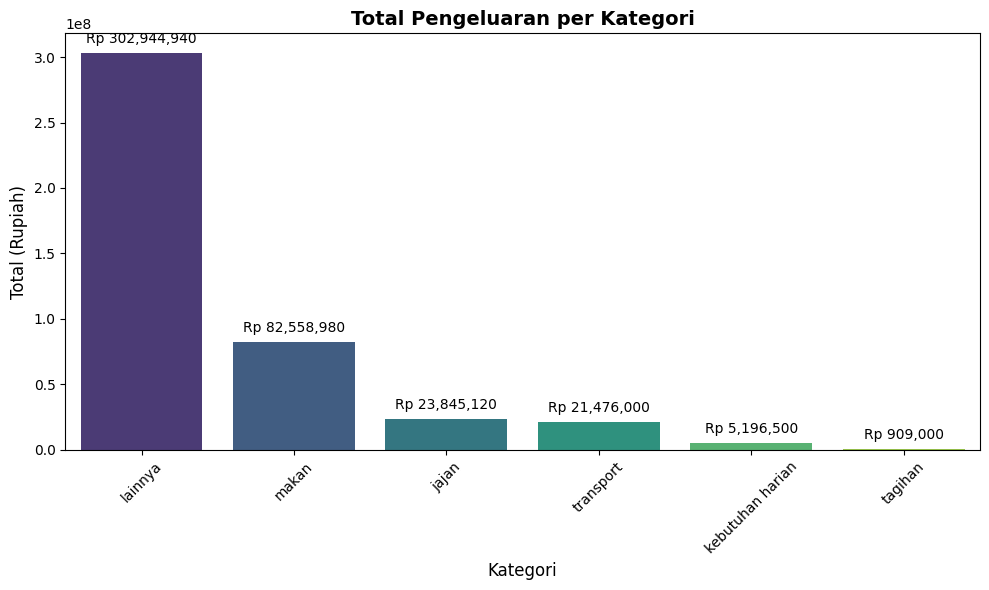

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(data = category_Recap, x='Category', y='Expense', hue='Category',palette='viridis')

plt.title('Total Pengeluaran per Kategori', fontsize=14, fontweight='bold')
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Total (Rupiah)', fontsize=12)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'Rp {p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize = 10
                )

plt.tight_layout()
plt.show()

## Visualisasi Line Chart

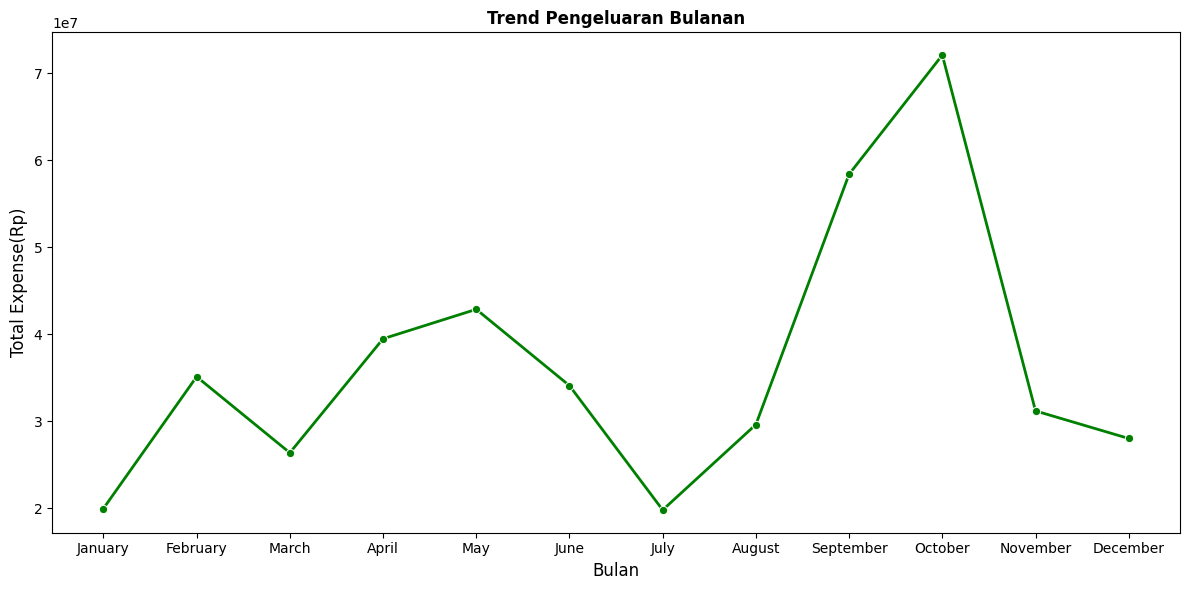

In [ ]:
plt.figure(figsize=(12,6))

monthly_trend = data_expense.groupby(data_expense['Date'].dt.month)['Expense'].sum().reset_index()

monthly_trend['Date'] = pd.to_datetime(monthly_trend['Date'], format='%m').dt.month_name()

sns.lineplot(data = monthly_trend, x='Date', y = 'Expense', marker = 'o', linewidth = 2, color = 'green')

plt.title('Trend Pengeluaran Bulanan', fontsize = 12, fontweight = 'bold')
plt.xlabel('Bulan', fontsize = 12)
plt.ylabel('Total Expense(Rp)', fontsize = 12)

plt.tight_layout()
plt.show()

## Visualisasi Outlier

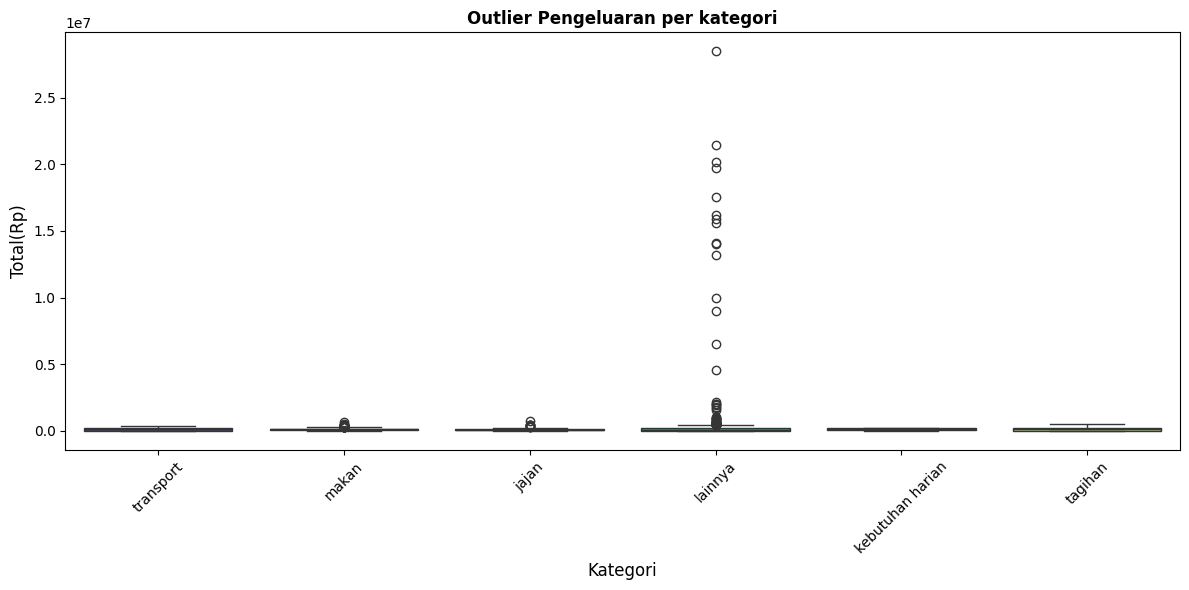

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(data = data_expense, x='Category', y='Expense', hue = 'Category', palette='viridis')

plt.title('Outlier Pengeluaran per kategori', fontsize = 12, fontweight = 'bold')
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Total(Rp)', fontsize = 12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Insight

Kategori makan sangat mendominasi karena sebagian besar pengeluaran harian itu berkaitan dengan konsumsi rutin, yang berdampak langsung pada pengeluaran harian.

Disarankan, bisa membuat penetapan anggaran maksimal setiap kategori untuk bisa mengontrol pengeluaran rutin.



# Kesimpulan

Analisis menunjukkan bahwa pengeluaran didominasi oleh kategori Makan dan Jajan dengan tren meningkat pada akhir tahun karena dipengaruhi oleh gaya hidup yang konsumtif. Dengan pengaturan anggaran pada setiap kategori, juga dilakukannya monitoring bulanan, terdapat potensi penghematan sekitar 15 - 20%